In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")

In [3]:
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
149,20,74000,0
4,19,76000,0
0,19,19000,0
362,47,50000,1
302,37,137000,1


In [4]:
from sklearn.model_selection import train_test_split
x = df.drop("Purchased", axis = 1)
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [5]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [9]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

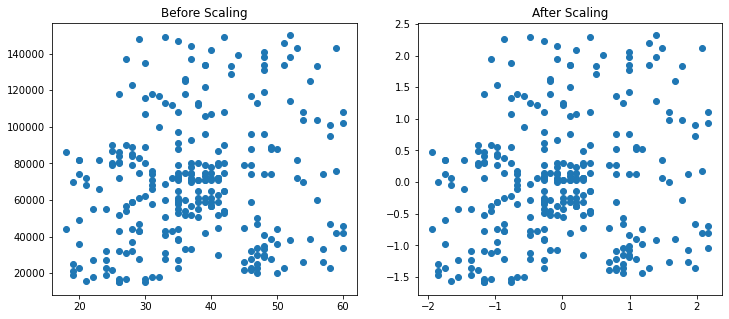

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

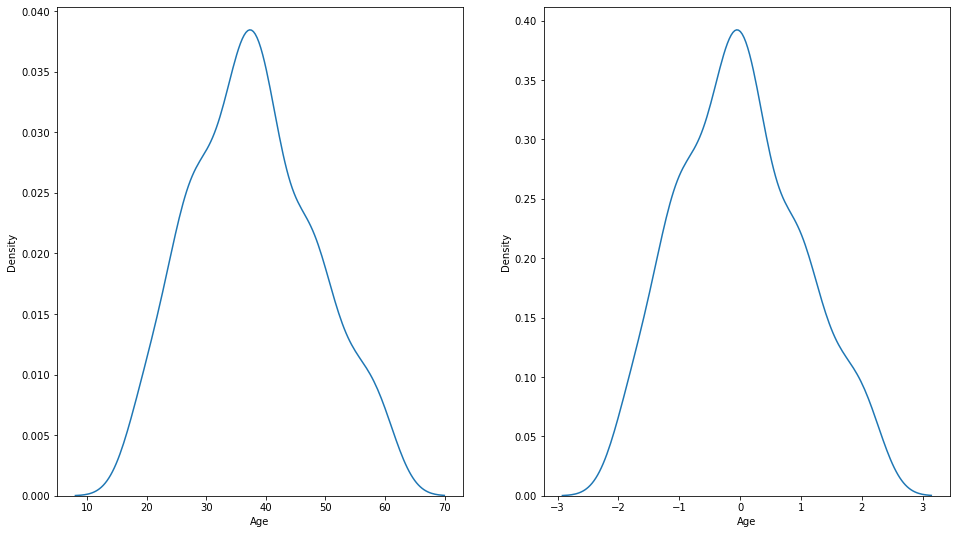

In [12]:
plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['Age'])
plt.subplot(1, 2, 2)
sns.kdeplot(X_train_scaled['Age'])
plt.show()

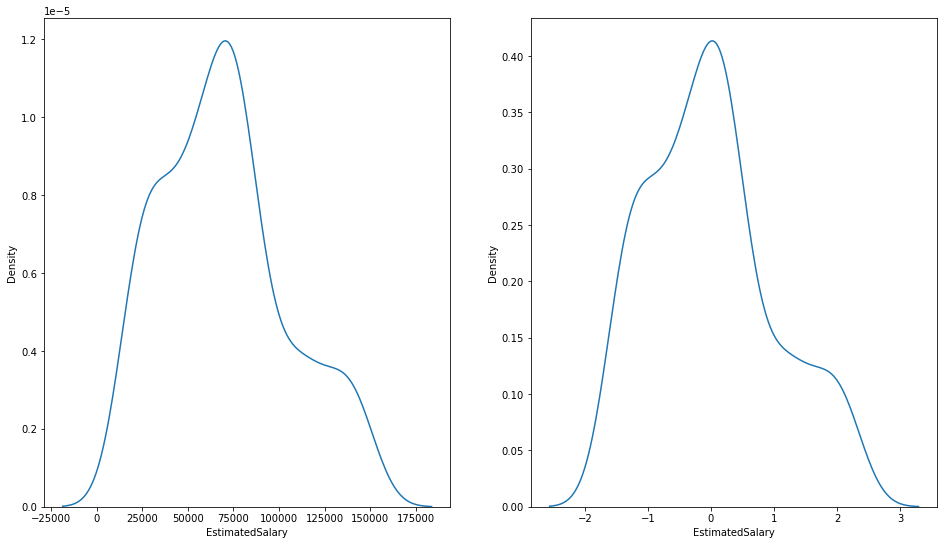

In [13]:
plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['EstimatedSalary'])
plt.subplot(1, 2, 2)
sns.kdeplot(X_train_scaled['EstimatedSalary'])
plt.show()

# Importance of Scaling

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

In [16]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [17]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Accuracy Score Scaled: {accuracy_score(y_test, y_pred_scaled)}')

Accuracy Score : 0.6583333333333333
Accuracy Score Scaled: 0.8666666666666667


Scaling doesn't reduce the impact of outliers

# When to Use Standardization?

1. K-Means Clustering
2. K-Nearest Neighbours
3. Principal Component Analysis
4. Gradient Descent